#  数据科学入门2.4：特征的选取和特征提取（PCA）
![](2020-04-12-10-26-41.png)

## 为什么要选取或者提取特征

对机器学习来说最重要的就是数据，数据中最重要的就是特征。如果你的数据中有乱七八糟的，
有干扰的东西，那么你训练出来的模型也会乱七八糟。所以我们在直接把数据送到模型里面去的之前
我们经常需要处理一下我们的特征，去掉没用的，留下有用的，甚至制造出一些新的特征。
特征提取或者选取得主要目的如下：

1. 减少计算的复杂度让模型训练起来更快
2. 减少过拟合的可能，提高泛化能力
3. 引入我们对数据的理解，提高模型精确度
（feature extracting，feature creation）
4. 减少干扰，提高模型的精确度
5. 简化模型，让模型可以变得能够解读

## 特征的选取（Feature selection）

特征选取就是选择对你预测有用的特征，而扔掉没用的。
通常有两类方法，一类叫作Filter，另一类叫做Wrapper。
我们这里不讲具体的怎么实现这两种方法，因为他有很多种实现方法，
我们就讲一下他的基本概念，和最基本的一些例子，然后你自己就会用了。

### Filter Method
![](2020-04-03-01-01-19.png)

这个就是如上图，你一开始有所有的特征，然后你根据某个原则来选择有用的特征。
例如我们讲过的可以通过correlation，就是相关系数来判断，
相关系数接近于1的一般就是好特征，接近0的就不是好特征。这个大家都知道。
但是这个只能判断两个连续变量之间的有没有关系。如果特征是类型变量，
或者标签是类型的变量，那么我们就要用例如Anova或者Chi-testing之类的方法了，
这个我们就不讲了。

还有一种方法就是EDA里面的把数据画出来，我们用眼睛看看，
这个可以做到类似Anova的效果，不过更加简单直接。我们看下面的例子。

还记得我们之前看的散点图吧？

![](2021-05-04-20-20-00.png)

![](2021-05-04-20-20-01.png)

可以看到下面的三种颜色的点基本都分开了，
而上面的黄色和红色就没有太分开，这样如果只允许选两个特征的话，
左边那两个就要好于右边那两个。我试了一下，
左边那两组训练出来的结果和4个特征基本没区别精确度可以到96.7%，
而右边那两组特征最高只能到78%。

我们甚至可以看到，只选择PetalLength这一个特征的时候，
三种也区分的很开，你们可以试试，这一个特征和4个特征比下降并不大。

![](2021-05-04-20-25-01.png)

### Wrapper Methods

这个方法也比较好理解，就是一开始你有很多特征，
然后你去选择几个训练模型，看效果怎么样，如果好就留下不好就换一组。

![](2020-04-03-13-52-59.png)

一般有几个套路哈，比如从只用一个特征开始，你尝试所有的特征，
选择最好的一个留下，然后在开始尝试2个特征，再加入上一轮中第二好的，
如果结果有提升就留下，没有提升或者提升很好就换一个，
直到你得到最好的一个2个特征的模型。然后你再尝试3个特征，同理，
但是如果你增加特征，不管增加哪一个特征，结果提升都很小，
那么就说明你现在的特征set，已经可以结束选择了。

![](2020-04-03-13-51-48.png)

或者和上面正好反过来，一开始你有所有的特征，
然后一个一个去掉，当去掉某一个影响不大时，
那他就可以被去掉，如果去掉某一个影响很大的时候，
就说明他很重要要留下来。

![](2020-04-03-13-51-57.png)

上面只是两个方法举例，大家可以自己根据实际情况
自己实现类似的特征选择的方法。还有一点就是有时候，
深度学习的一些方法，对特征选择并不是太敏感，
你可以用的domain knowledge把没用的特征去掉，
然后使用剩下全部的特征训练。

当然以上都不是绝对的，机器学习建模有时候像一门艺术，
不是技术，需要你玩的多了就有感觉了。

## 特征提取和PCA（Future extraction and PCA）

之前讲过PCA，这个例子其实比较合适，
因为有的特征基本包括了大部分的variation，
我们来试试。首先我们选择PCA，然后选择降维到1维，看看效果：

In [1]:
# 导入数据
import pandas as pd
from sklearn import model_selection

iris = pd.read_csv('exp9.csv')
iris.drop(columns=['Id'], inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca.fit(iris.iloc[:, :-1].values)
print('components matrix: \n\n {} \n'.format(pca.components_))
print('explained variance ratio: \n\n {}'.format(pca.explained_variance_ratio_))

components matrix: 

 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]] 

explained variance ratio: 

 [0.92461621 0.05301557 0.01718514 0.00518309]


先来简单看一下四个主成分时的输出：

下面的explained variance ratio表示每个主成分（PC）的解释程度，
可以看到第一个主成分能够解释92.46%的数据变化。
上面的components matrix的每一个向量代表了主成分的组成成分，可以看到
第一个主成分中第三个变量的系数是0.857，我们回头看数据发现就是
PetelLength这个特征。

好然后我们来看筛选特征之后怎么用到模型里，这里模型我们还是用SVM：

In [4]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, plot_confusion_matrix
from matplotlib import pyplot as plt
import numpy as np


def plot_cm(model, y_true, y_pred, name=None):
    """画混淆矩阵
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def plot_cm_ratio(model, y_true, y_pred, name=None):
    """画混淆矩阵（按占各类型比例）
    :param model: 分类模型
    :param y_true: 标签实际值
    :param y_pred: 标签预测值
    :param name: 模型名称
    """
    _, ax = plt.subplots()
    if name is not None:
        ax.set_title(name)
    cm = confusion_matrix(y_true, y_pred)
    cm_ratio = np.zeros(cm.shape)
    for i in range(len(cm)):
        for j in range(len(cm[i])):
            cm_ratio[i, j] = cm[i, j] / cm[i].sum()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_ratio, display_labels=model.classes_)
    disp.plot(ax=ax)
    plt.show()
    return None


def model_perf(model, y_true, y_pred, name=None):
    """返回模型分类准确率，tpr，fpr
    """
    if name is not None:
        print('For model {}: \n'.format(name))
    cm = confusion_matrix(y_true, y_pred)
    for i in range(len(model.classes_)):
        tp = cm[i, i]
        fp = cm[:, i].sum() - cm[i, i]
        fn = cm[i, :].sum() - cm[i, i]
        tn = cm.sum() - tp - fp - fn
        tpr = tp / (tp + fn)
        fpr = fp / (tn + fp)
        acc = (tp + tn) / cm.sum()
        print('For class {}: \n TPR is {}; \n FPR is {}; \n ACC is {}. \n'
        .format(model.classes_[i], tpr, fpr, acc))
    return None


def ovo_eval(model, name=None):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    plot_cm(model, y_test, prediction, name)
    plot_cm_ratio(model, y_test, prediction, name)
    model_perf(model, y_test, prediction, name)
    print('Overall Accuracy: {}'.format(model.score(X_test, y_test)))

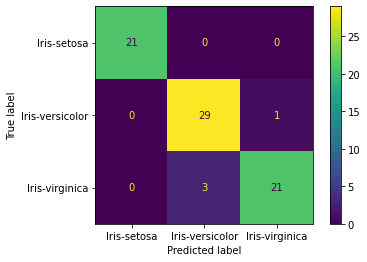

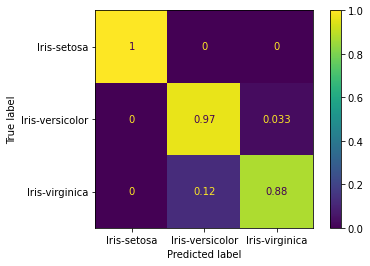

For class Iris-setosa: 
 TPR is 1.0; 
 FPR is 0.0; 
 ACC is 1.0. 

For class Iris-versicolor: 
 TPR is 0.9666666666666667; 
 FPR is 0.06666666666666667; 
 ACC is 0.9466666666666667. 

For class Iris-virginica: 
 TPR is 0.875; 
 FPR is 0.0196078431372549; 
 ACC is 0.9466666666666667. 

Overall Accuracy: 0.9466666666666667


In [5]:

# 这里如果出不来先在工作区里运行一下上一讲里的classification.py
# 或者你把那一套函数粘过来也行
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
pca = PCA(n_components=1)
X_train, X_test, y_train, y_test = train_test_split(iris.iloc[:, :-1], iris.iloc[:, -1], 
test_size=.5, random_state=0)
pca.fit(X_train)
X_train_new, X_test_new = pca.transform(X_train), pca.transform(X_test)

model = SVC(kernel='rbf')
model.fit(X_train, y_train)
ovo_eval(model)